## Importing Libraries

In [116]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import export_text
import matplotlib.pyplot as plt
import graphviz

## Loading Dataset

In [64]:
df = pd.read_csv('/Users/praveesha/Desktop/IS733/lab/Week4/tennis.csv')

## Task 2b
#### 1. Computing Information gain for given pair of input attributes and output attributes


In [66]:
# Define the entropy calculation function
def entropy(attribute_column):
    """
    Calculate entropy for a column (either input or output).
    """
    # Get the frequency of each unique value in the column
    value_counts = attribute_column.value_counts()
    probabilities = value_counts / len(attribute_column)
    
    # Calculate entropy using the formula: -sum(p * log2(p))
    entropy_value = -sum(probabilities * np.log2(probabilities))
    
    return entropy_value

# Define the function to calculate information gain
def information_gain(data, input_attribute, output_attribute):
    """
    Calculate information gain for a selected input attribute and output attribute.
    Display entropy values during the process.
    """
    # Calculate entropy of the output attribute
    total_entropy = entropy(data[output_attribute])
    print(f"Entropy of {output_attribute}: {total_entropy:.4f}")
    
    # Calculate the entropy of the input attribute after splitting
    values, counts = np.unique(data[input_attribute], return_counts=True)
    
    # Calculate the weighted entropy
    weighted_entropy = 0
    for i, value in enumerate(values):
        subset = data[data[input_attribute] == value]
        subset_entropy = entropy(subset[output_attribute])
        weighted_entropy += (counts[i] / np.sum(counts)) * subset_entropy
        print(f"Entropy of {output_attribute} for {input_attribute} = {value}: {subset_entropy:.4f}")
    
    # Information gain is the difference between total entropy and weighted entropy
    info_gain = total_entropy - weighted_entropy
    
    return total_entropy, weighted_entropy, info_gain


In [62]:
# Ask user for input and output attributes
input_attr = input("Enter the input attribute (e.g., 'Outlook', 'Temperature', 'Humidity', 'Windy'): ")
output_attr = 'Play'  # The output attribute is fixed as 'Play'

# Calculate and display information gain
total_entropy, weighted_entropy, info_gain = information_gain(df, input_attr, output_attr)

# Display final results
print(f"Weighted Entropy after splitting on {input_attr}: {weighted_entropy:.4f}")
print(f"Information Gain for {input_attr} and {output_attr}: {info_gain:.4f}")

Enter the input attribute (e.g., 'Outlook', 'Temperature', 'Humidity', 'Windy'):  Outlook


Entropy of Play: 0.0000
Entropy of Play for Outlook = nan: 0.0000
Weighted Entropy after splitting on Outlook: 0.0000
Information Gain for Outlook and Play: 0.0000


#### 2. Building Decision Tree

AUC-ROC Score: 1.0000


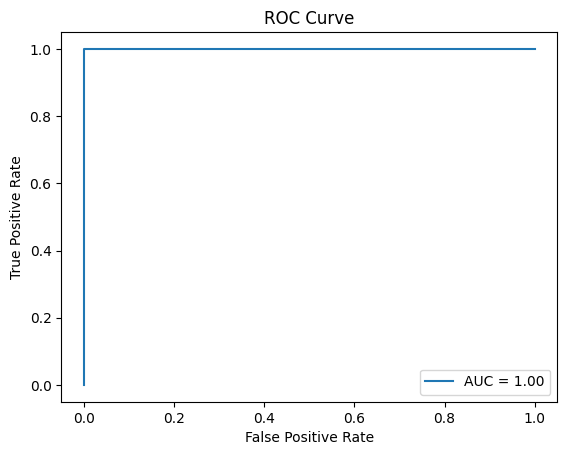

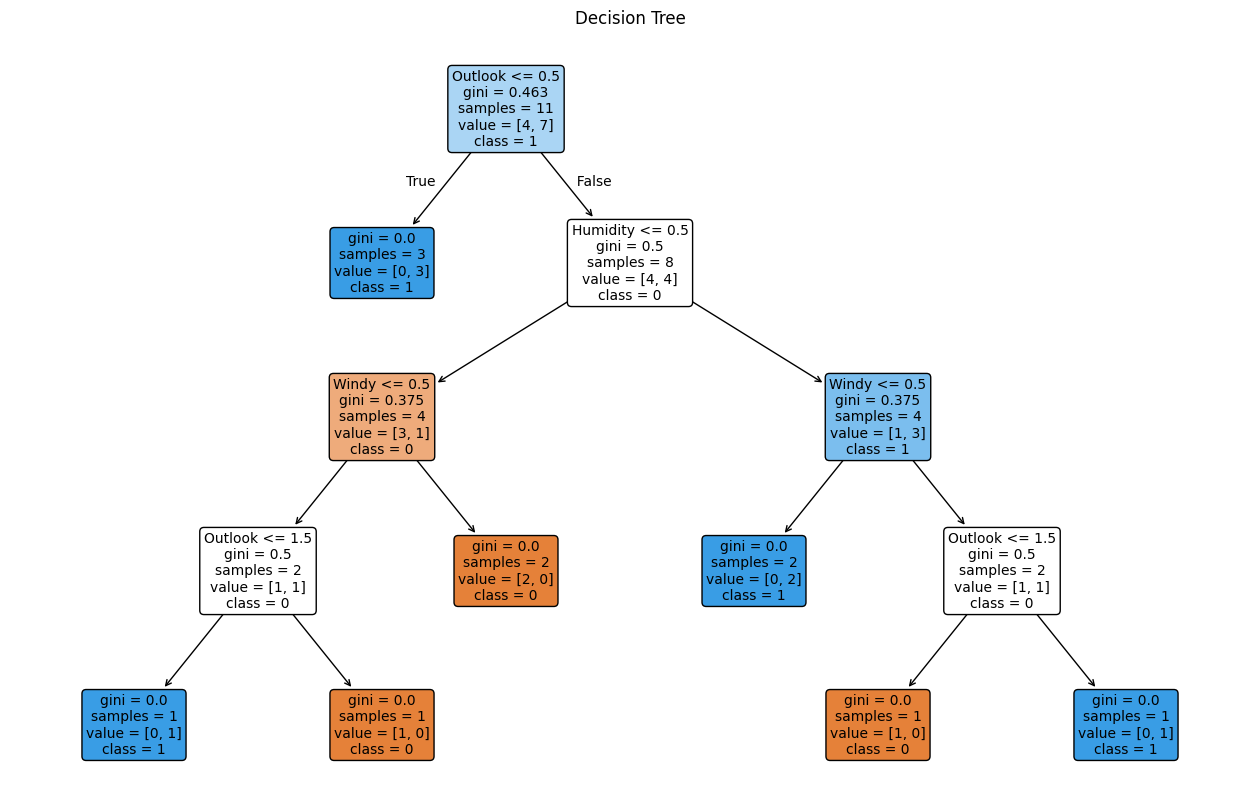

In [102]:
# Preprocessing - Encode categorical features
label_encoders = {}
for column in df.columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Separate input features and output target
X = df.drop('Play', axis=1)
y = df['Play']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict probabilities for ROC-AUC calculation
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Calculate AUC-ROC score
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"AUC-ROC Score: {auc_score:.4f}")

# Plot the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

# Convert class names to strings explicitly to avoid type mismatch error
class_names = list(map(str, label_encoders['Play'].classes_))

# Visualize the Decision Tree with improved readability
plt.figure(figsize=(16,10))  # Increase the figure size to make the tree less congested
plot_tree(clf, feature_names=X.columns, 
          class_names=class_names,  # Ensure class names are strings
          filled=True, 
          rounded=True,  # Rounded boxes for better clarity
          fontsize=10,   # Adjust font size to prevent overlap
          proportion=False)  # Proportion ensures equal branch width regardless of samples
plt.title('Decision Tree')
plt.show()


## Task 3
#### b. Evaluating model performance given prediction and true labels
####    True_labels = [1,0,1,0,1,1,0,0,1,0], Predicted_Labels = [1,1,1,0,1,0,0,1,1,0]

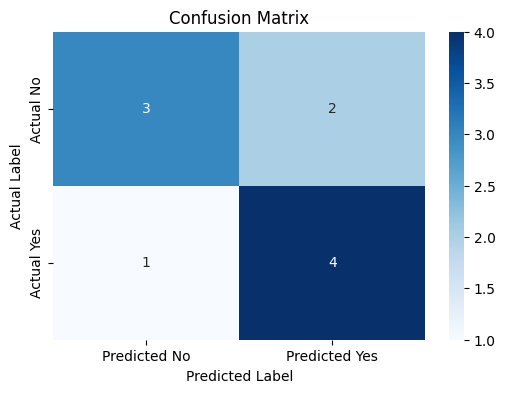

True Positives (TP): 4
True Negatives (TN): 3
False Positives (FP): 2
False Negatives (FN): 1
Accuracy: 0.7000
Precision: 0.6667
Recall (Sensitivity/TPR): 0.8000
F1 Score: 0.7273
True Positive Rate (TPR): 0.8000
False Positive Rate (FPR): 0.4000
Specificity: 0.6000
Negative Predictive Value (NPV): 0.7500


In [123]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Given true and predicted labels
true_labels = [1, 0, 1, 0, 1, 1, 0, 0, 1, 0]
predicted_labels = [1, 1, 1, 0, 1, 0, 0, 1, 1, 0]

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
tn, fp, fn, tp = cm.ravel()

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

# Calculate metrics
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels)

# True Positive Rate (TPR) / Sensitivity
tpr = recall

# False Positive Rate (FPR)
fpr = fp / (fp + tn)

# Specificity (True Negative Rate)
specificity = tn / (tn + fp)

# Negative Predictive Value (NPV)
npv = tn / (tn + fn)

# Print the metrics
print(f"True Positives (TP): {tp}")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity/TPR): {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"True Positive Rate (TPR): {tpr:.4f}")
print(f"False Positive Rate (FPR): {fpr:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Negative Predictive Value (NPV): {npv:.4f}")
